## 问答题
1.支持向量机的基本思想是什么？
支持向量机的基本思想是找到一个最优决策边界，使得不同类别的数据点之间的间隔最大化。

2.什么是支持向量？
支持向量是距离决策边界最近的那些数据点。

3.在使用 SVM 时，缩放输入值为什么很重要？
因为SVM 对输入特征的尺度非常敏感，数值范围较大的特征会影响模型的优化。所以需要对输入特征进行标准化或归一化处理。

4.SVM 分类器在对实例进行分类时能输出置信度分数吗？概率呢？
SVM 可以输出决策函数值。
SVM无法直接输出概率，但可通过超参数设定。

5.你如何在 LinearSVC、SVC 和 SGDClassifier 之间进行选择？
LinearSVC：基于线性核的 SVM 实现，使用坐标下降算法优化，适合大规模线性可分问题。
SVC:支持多种核函数，适合中小型数据集的非线性问题。
SGDClassifier :使用随机梯度下降优化, 可以在线学习。

6.假设你已经使用 RBF 核训练了一个 SVM 分类器，但它似乎欠拟合训练集。 你应该增大还是减小 γ（gamma）？C 呢？
 当模型欠拟合，C和γ都需要增大。

7.ε 不敏感模型是什么意思？
在回归问题中，支持向量回归（SVR)允许预测值与真实值之间存在一个ε 的误差容忍范围。只有当预测误差超过 ε 时，才会计算损失。
这种机制使得 SVR 对小误差不敏感，从而鼓励模型找到一个平滑的回归函数，避免过拟合。

8.使用核技巧有什么意义？
核技巧让 SVM 能够以较低计算成本解决复杂的非线性分类/回归问题。

## 编程题
1. 在葡萄酒数据集上训练SVM分类器，可以使用sklearn.datasets.load_wine()加载它。该数据集包含3个不同种植者生产的178个葡萄酒样本的化学分析：目标是训练一个分类模型，该模型能够根据葡萄酒的化学分析预测种植者。由于SVM分类器是二元分类器，将需要使用“一对全部”对所有三个类进行分类。能达到的精度是多少？

   "一对全部"可以复习 **8_sklearn做分类.ipynb**里的笔记，里面提到了用二元分类器做多分类问题

---

2. 提前预习 **10_支持向量机.ipynb** 最新更新的笔记 （把SVM分类用梯度下降实现）； 大概理解笔记后，尝试自己对照笔记 实现用梯度下降实现SVM分类

   并把自定义的SVM分类用于 iris data(鸢尾花数据)； 取花瓣长度 和 花瓣宽度特征， 分类 看是不是 分类2的花 （(iris.target == 2)

   对比下sklearn自带的SVM分类 和 自定义SVM分类 实现的分类效果



In [1]:
from random import random

from isapi.install import verbose
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
import pandas as pd
import numpy as np

In [7]:
wine = load_wine()
X = wine.data
y = wine.target


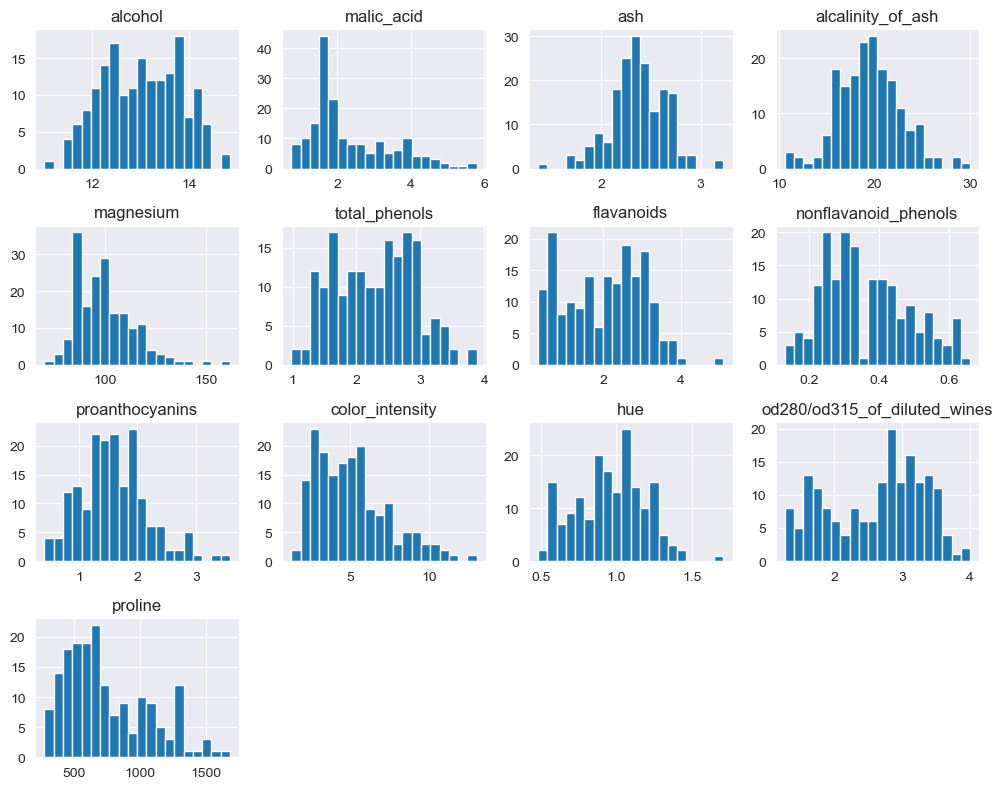

In [16]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

wine = load_wine()
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)

wine_data.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('OneVsRestClassifier', OneVsRestClassifier(SVC(random_state=42)))
])

In [15]:
param_grid = {
    'OneVsRestClassifier__estimator__C': [0.01, 0.1, 1, 10, 100],
    'OneVsRestClassifier__estimator__kernel': ['linear', 'rbf', 'poly'],
    'OneVsRestClassifier__estimator__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'OneVsRestClassifier__estimator__degree': [2, 3, 4]  # 多项式核专用
}


In [20]:
grid =GridSearchCV(
     model,
     param_grid,
     cv=10,
     scoring='accuracy',
     n_jobs=-1,
     verbose=1
)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"测试集准确率: {accuracy:.4f}")
print(f"最佳参数: {grid.best_params_}")

Fitting 10 folds for each of 270 candidates, totalling 2700 fits
测试集准确率: 1.0000
最佳参数: {'OneVsRestClassifier__estimator__C': 0.01, 'OneVsRestClassifier__estimator__degree': 2, 'OneVsRestClassifier__estimator__gamma': 'scale', 'OneVsRestClassifier__estimator__kernel': 'rbf'}


In [23]:
np.logspace(-2,2,6)
# np.linspace(-2,2,6)

array([1.00000000e-02, 6.30957344e-02, 3.98107171e-01, 2.51188643e+00,
       1.58489319e+01, 1.00000000e+02])

In [24]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = iris["target"]

In [26]:
# Scikit-Learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42, kernel='linear', C=1.0))
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f" Scikit-Learn准确率: {accuracy:.4f}")

 Scikit-Learn准确率: 1.0000


In [28]:
#自定义svm
class CustomSVM:
    def __init__(self, C=1.0, learning_rate=0.1, max_iter=1000, tol=1e-3):
        self.C = C
        self.lr = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.max_iter):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1

                if condition:
                    dw = self.w
                    db = 0
                else:
                    dw = self.w - self.C * y_[idx] * x_i
                    db = self.C * y_[idx]

                self.w -= self.lr * dw
                self.b -= self.lr * db

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

    def decision_function(self, X):
        return np.dot(X, self.w) - self.b




In [31]:
svm_custom = CustomSVM(C=1.0, learning_rate=0.1, max_iter=1000)
svm_custom.fit(X_train, y_train)
pred_custom = svm_custom.predict(X_test)
acc_custom = accuracy_score(y_test, pred_custom)

print(f"CustomSVM 准确率: {acc_custom:.4f}")


CustomSVM 准确率: 0.3000


In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import loguniform
from scipy.stats import reciprocal, uniform
from sklearn.metrics import mean_squared_error, r2_score

housing = fetch_california_housing()




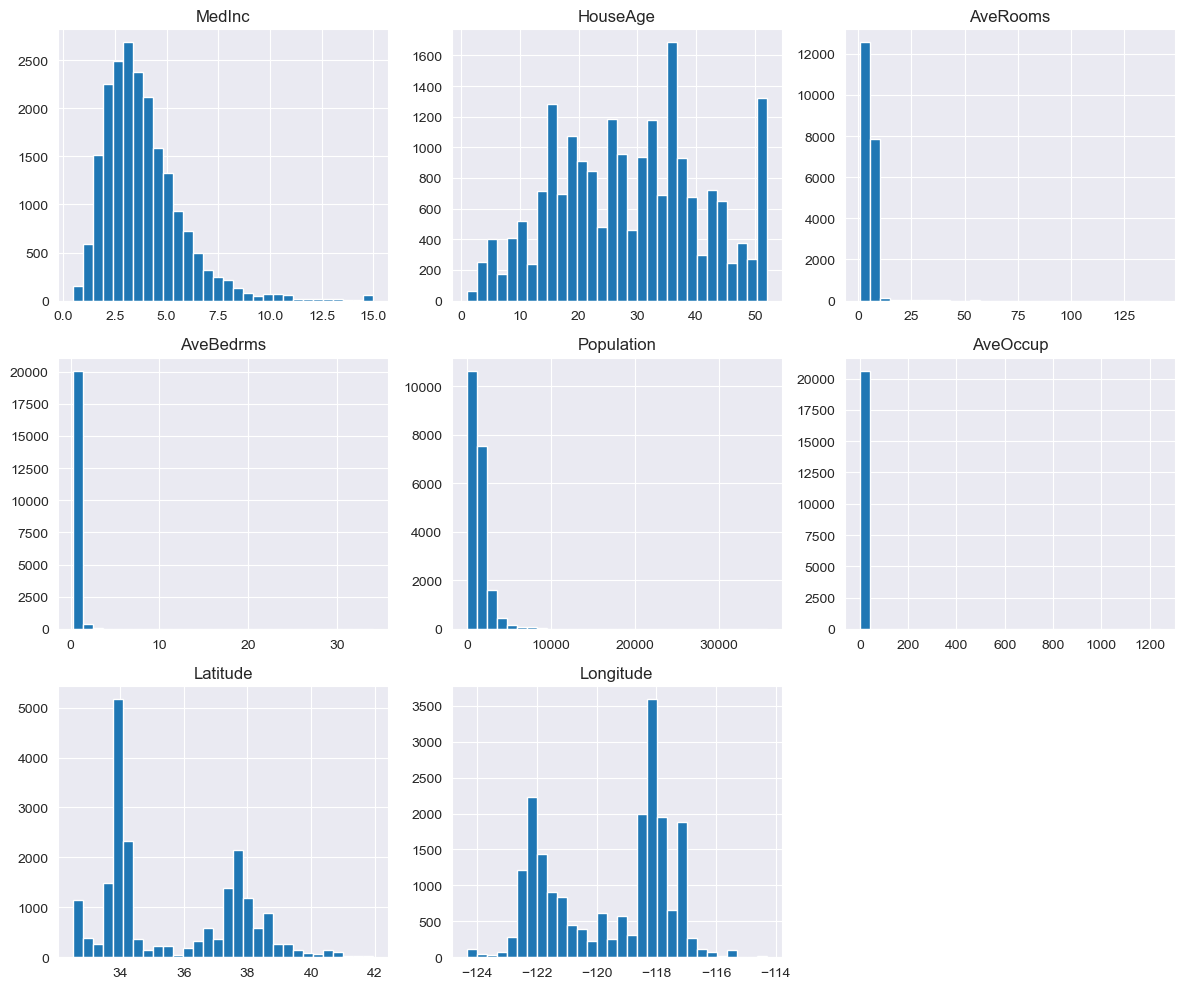

In [35]:
import matplotlib.pyplot as plt

housing = pd.DataFrame(housing.data, columns=housing.feature_names)

housing.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

In [31]:
housing.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [29]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [4]:
housing_1 = fetch_california_housing()
X = housing_1["data"]
y = housing_1["target"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

In [9]:
param = {
    'svr__kernel': ['rbf'],
    'svr__C':      loguniform(1, 1000),
    'svr__gamma':  loguniform(1e-4, 1e-1),
    'svr__epsilon': loguniform(1e-2, 1)
}

In [12]:
rand = RandomizedSearchCV(model,
                          param,
                          n_iter=50,
                          cv=5,
                          n_jobs=-1,
                          scoring='neg_mean_squared_error',
                          random_state=42,
                          verbose=1)

rand.fit(X_train, y_train)
best_model = rand.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"测试集RMSE: {rmse:.4f}")
print(f"测试集R²: {r2:.4f}")
print(f"最佳参数: {rand.best_params_}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
测试集RMSE: 0.5700
测试集R²: 0.7521
最佳参数: {'svr__C': 43.664735929796315, 'svr__epsilon': 0.02342658105820405, 'svr__gamma': 0.08105016126411585, 'svr__kernel': 'rbf'}
